## Problem statement

How student perfomance is affected by other variables such as gender ,ethinicity etc

## Data
data was collected from :[View Data](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)

## Importing Libraries/modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


## Importing CSV dataset

In [8]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Dataset Information

Gender :sexuality of the individual -> (male/female)

Race/ethnicity :Race of students-> (Group A,Group B,Group C)

Parental level of education :parents final education ->(Bachelor's Degree,some college,master's degree,associate degree,high school)

lunch: type of food before taking the exam->(standard ,free/reduced)

Test preparation course :preparedness before taking test->(complete or not complete)

Math score :score

Reading Score :score

Writing Score :score

## Data Checks
Missing values

Duplicates

Data types

Unique Values

Statistics

Categories



In [ ]:
# checking missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
#checking for duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
# checking for data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [18]:
# checking for unique values
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [19]:
# Statistics of the dataset
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Insights
all variables have 1000 entries

mean scores
Math=66
Reading=69
Writing =68
All means are close to each other

Standard Deviation
Maths  :68% of students scored between (51,81)
Reading  :68% of students scored between (54.5,83.6)
Writing :68% of students scored between(53,83)
There is moderate variability in scores as the standard deviation is close to each other

Minimum and maximum
The minimum score is 0 for Math,and is high for writing with 10 and higher for reading with 17






## Data Exploration

In [21]:
print(df['gender'].unique())
print(df['parental level of education'].unique())
print(df['lunch'].unique())
print(df['test preparation course'].unique())


['female' 'male']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [23]:
# Numerical and Categorical Features

numerical_features=[feature for feature in df.columns if df[feature].dtype !='object']
categorical_features=[feature for feature in df.columns if df[feature].dtype =='object']
print('Numerical Features:',numerical_features)
print('Categorical Features:',categorical_features)

Numerical Features: ['math score', 'reading score', 'writing score']
Categorical Features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


# Feature Engineering
Creating new variables i.e total scores and average scores

In [32]:
df['Total_score']=df['math score']+df['reading score']+df['writing score']
df['average_score']=df['Total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [37]:
reading=df[df['reading score']==100]['average_score'].count()
writing=df[df['writing score']==100]['average_score'].count()
math=df[df['math score']==100]['average_score'].count()
print('Number of students with 100 in reading:',reading)
print('Number of students with 100 in writing:',writing)
print('Number of students with 100 in math:',math)

Number of students with 100 in reading: 17
Number of students with 100 in writing: 14
Number of students with 100 in math: 7


In [39]:
reading50=df[df['reading score']<=50]['average_score'].count()
writing50=df[df['writing score']<=50]['average_score'].count()
math50=df[df['math score']<=50]['average_score'].count()
print('Number of students with 50 or less in reading:',reading50)
print('Number of students with 50 or less in writing:',writing50)
print('Number of students with 50 or less in math:',math50)

Number of students with 50 or less in reading: 97
Number of students with 50 or less in writing: 124
Number of students with 50 or less in math: 150


## Insights
Students perfomed worse in Maths

Best perfomance is in Reading


## Visualisations

average score distributions

histograms

kernel distribution function

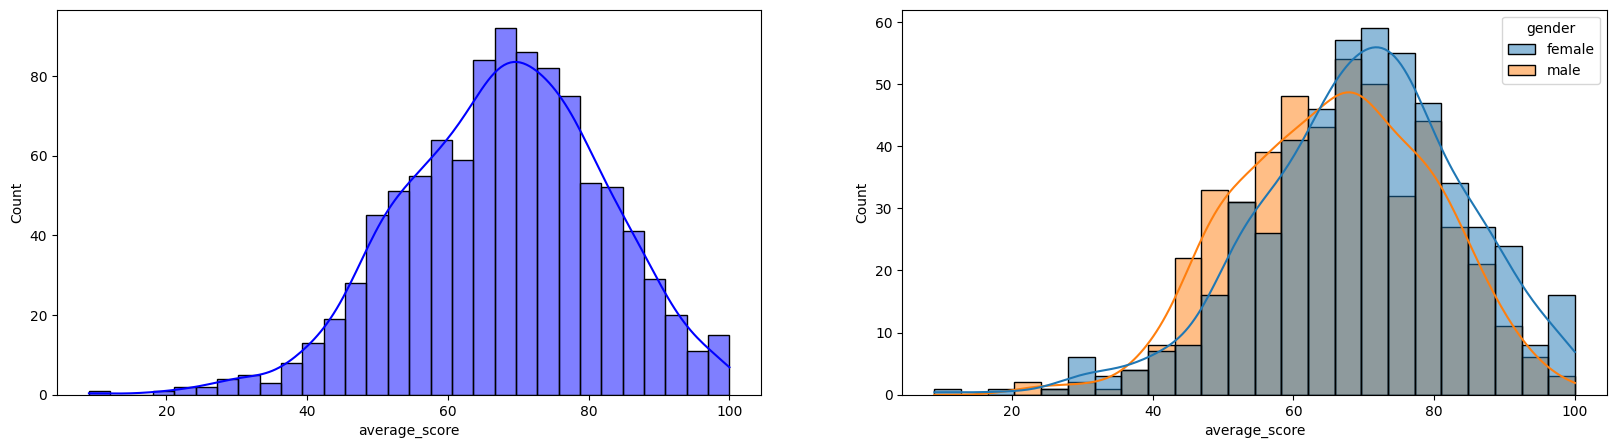

In [40]:
fig,ax=plt.subplots(1,2,figsize=(20,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='blue')
plt.subplot(1,2,2)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()


## insights
Female students tend to perfom well than male students

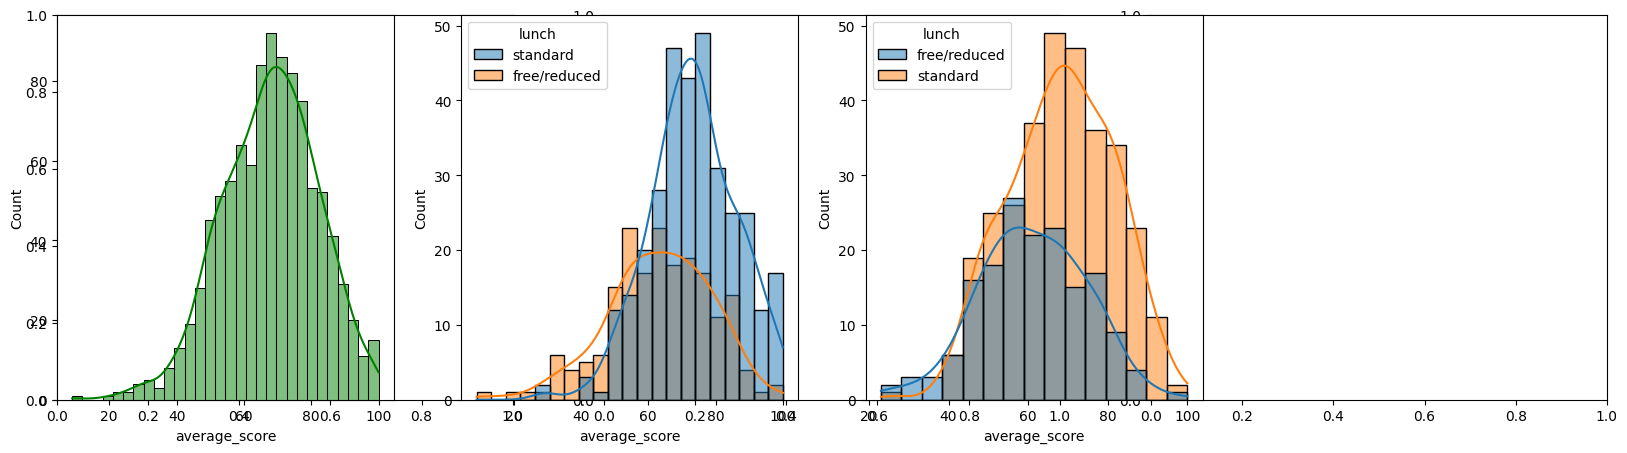

In [47]:
plt.subplots(1,3,figsize=(20,5))
plt.subplot(1,4,1)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='green')
plt.subplot(1,4,2)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(1,4,3)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch')
plt.show()






## Insights

Standard lunch helps perfom well in exams for both genders

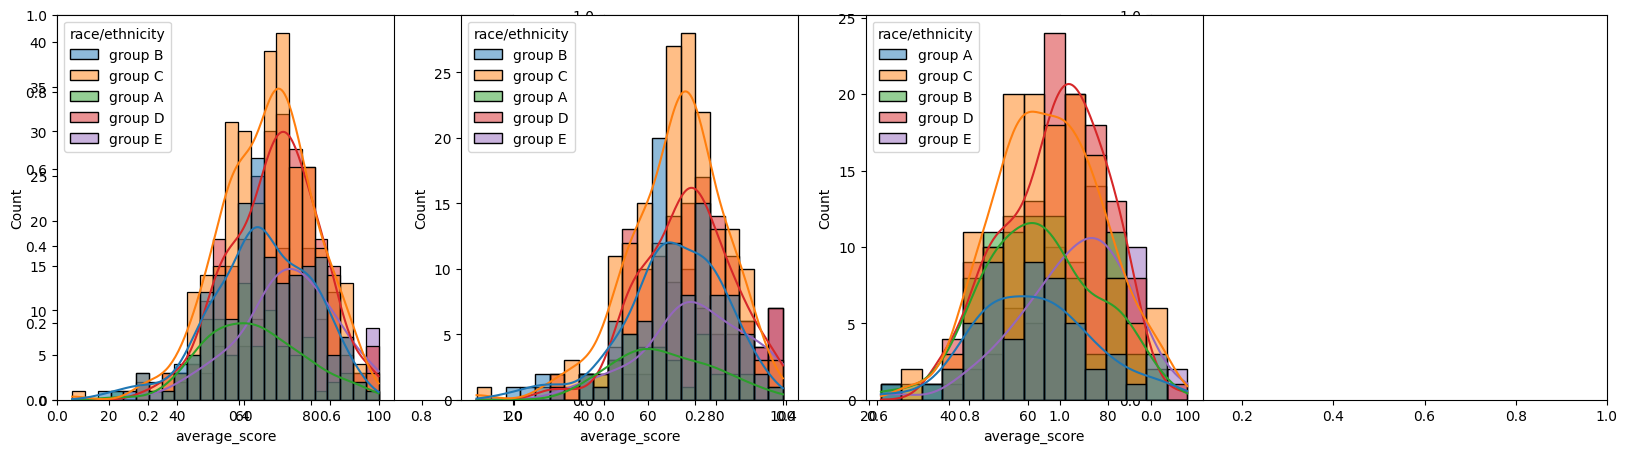

In [51]:
plt.subplots(1,3,figsize=(20,5))
plt.subplot(1,4,1)
ax=sns.histplot(data=df,x='average_score',kde=True,hue='race/ethnicity')
plt.subplot(1,4,2)
ax=sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race/ethnicity')
plt.subplot(1,4,3)
ax=sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race/ethnicity')
plt.show()

## Insights
Group C tends to perfom well compared to other groups

female students in group C perfoms better 

Male students in group D perfoms better than the rest

Students in groups  A ,B,E perfoms poor regardless of gender

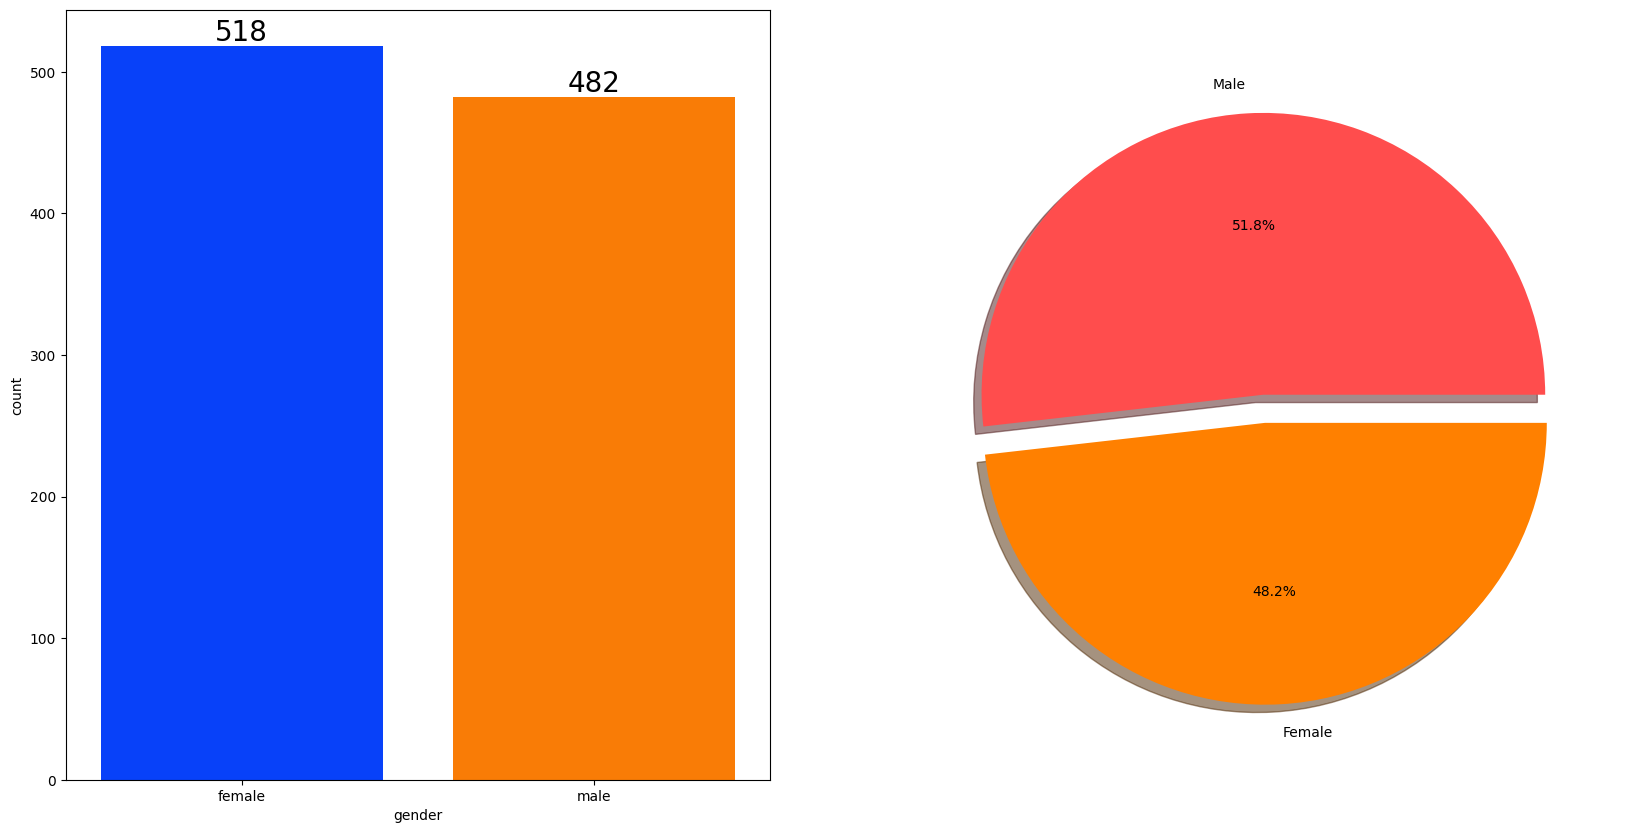

In [52]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

## Insights
Gender has an almost balanced data

## Bivariate analysis
does gender have impact on syudent perfomance?

In [ ]:
df['average'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

gender_group = df.groupby('gender').mean(numeric_only=True)

<Figure size 1000x800 with 0 Axes>

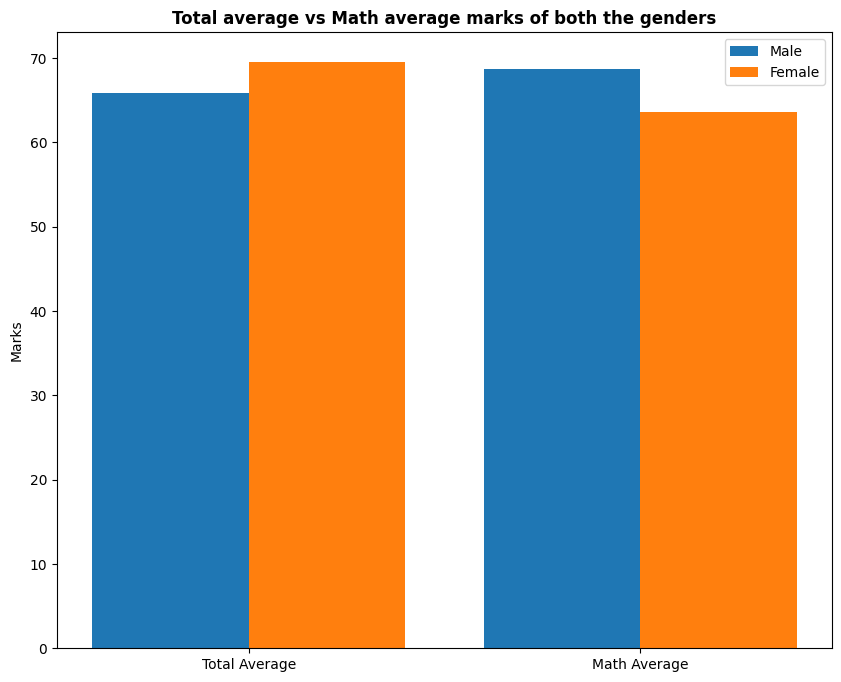

In [ ]:
plt.figure(figsize=(10, 8))

X = ['Total Average', 'Math Average']

female_scores = [gender_group.loc['female', 'average'], gender_group.loc['female', 'math score']]
male_scores = [gender_group.loc['male', 'average'], gender_group.loc['male', 'math score']]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average vs Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()


## Insights
female tends to perfom better than male on average
for Math males scored well than females

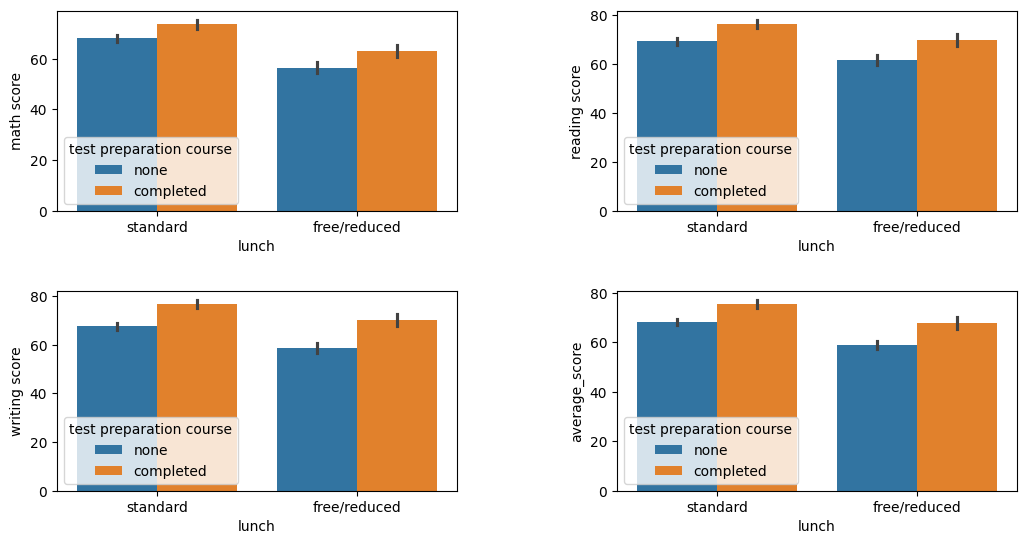

In [60]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])
plt.subplot(2,2,4)
sns.barplot (x=df['lunch'], y=df['average_score'], hue=df['test preparation course'])
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

## insights
students with completed  test preparation course have higher score in all categories compared to those who did not take the course

checking outliers

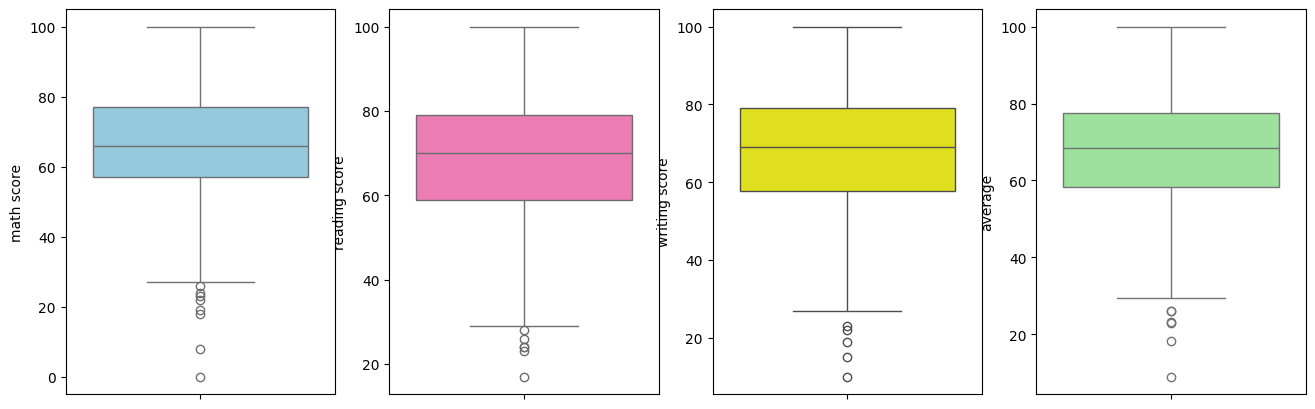

In [61]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

pairplot multivariate analysis

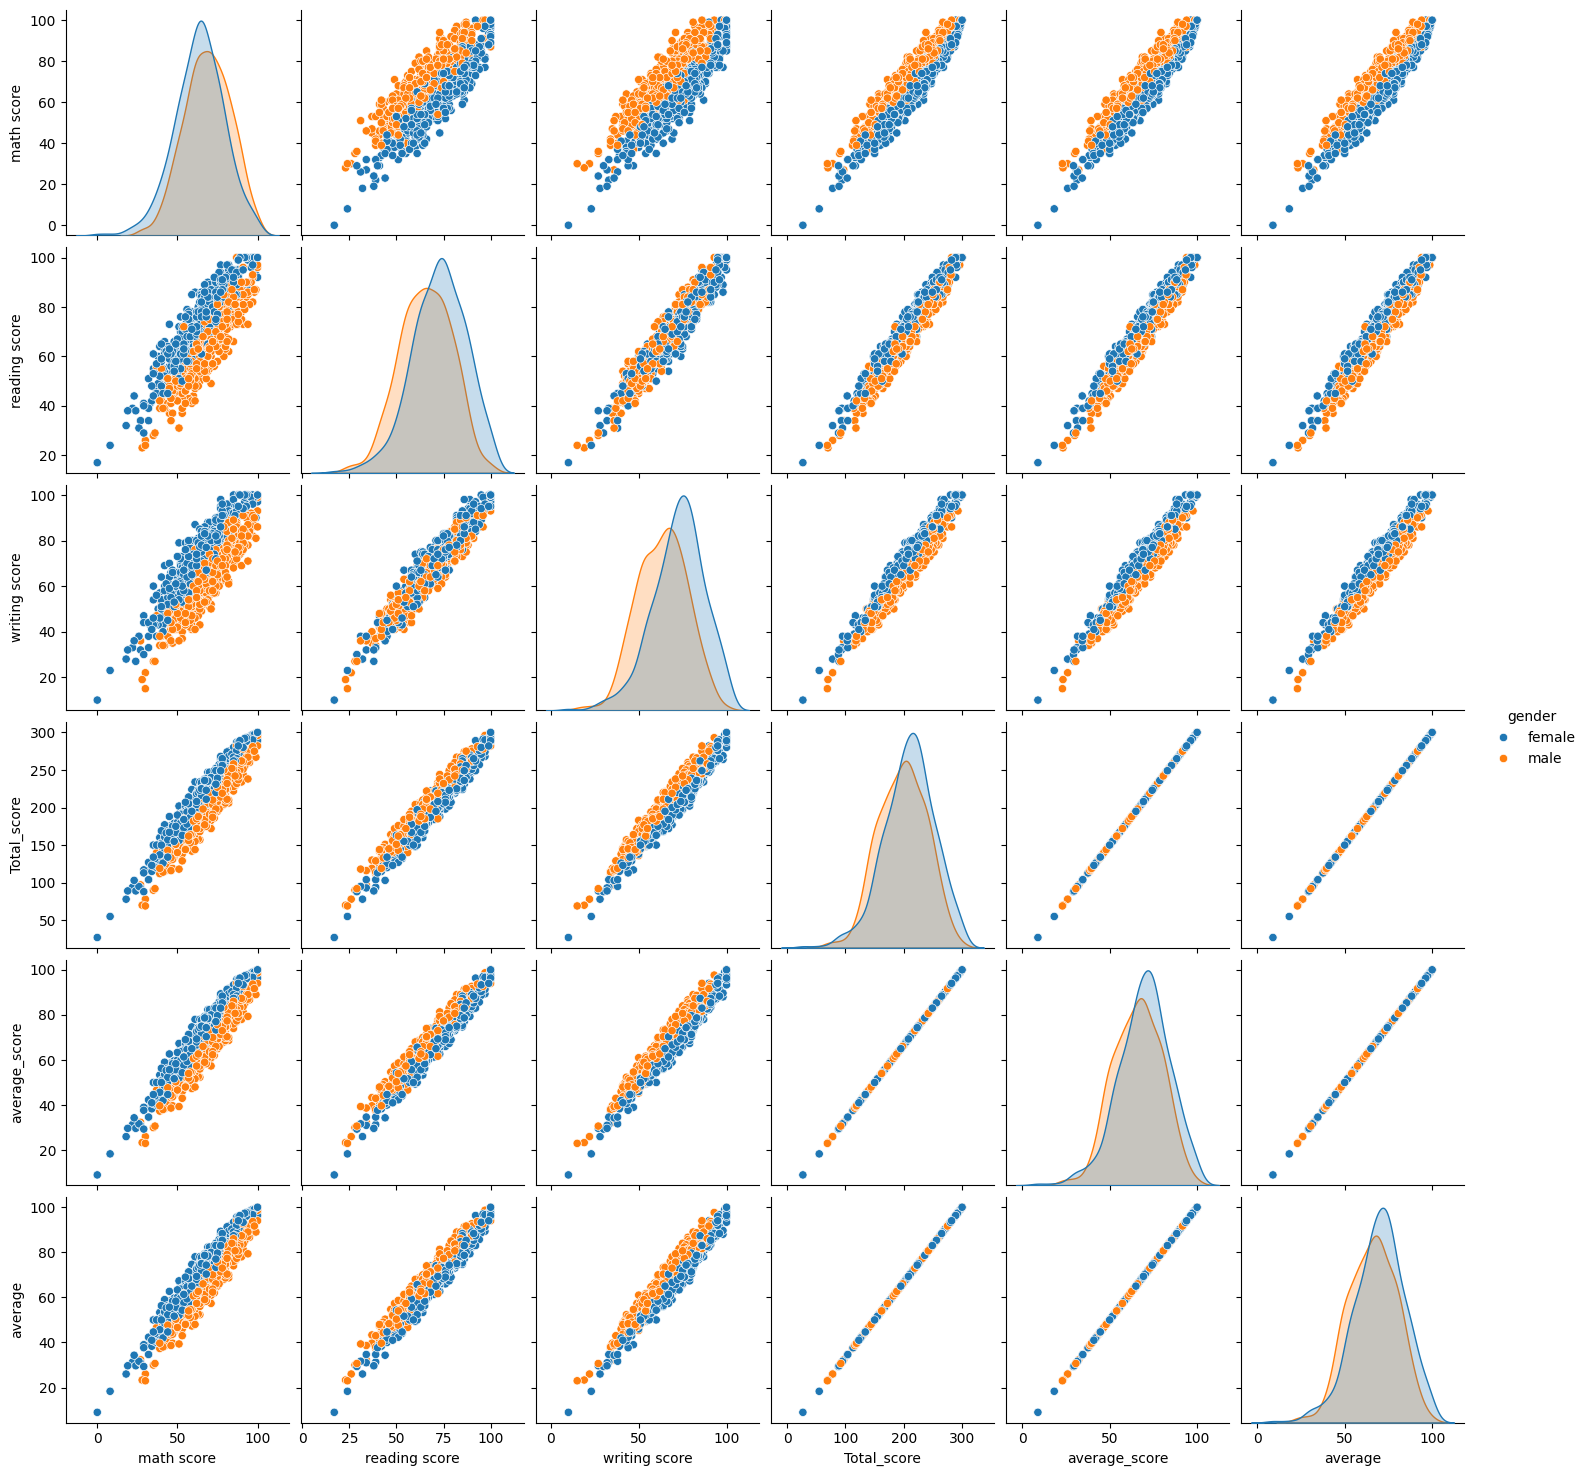

In [62]:
sns.pairplot(df,hue = 'gender')
plt.show()

## Insights
all scores increase linearly with each other

## Conclusions
Students perfomance is related with lunch,race

Female students are top scorers

Taking preparation course is important